In [1]:
import harp
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from functools import reduce
import utils
import numpy as np

h1_reader = harp.create_reader('h1-device.yml', epoch=harp.REFERENCE_EPOCH)

root_folder = r'/home/ikharitonov/Desktop/RANCZLAB-NAS/data/ONIX/20260120_Cohort7_rotation/Visual_mismatch_SD_day2/B6J4070-2026-01-29T13-52-08'

h1_datafolder = r'/home/ikharitonov/Desktop/RANCZLAB-NAS/data/ONIX/20260120_Cohort7_rotation/Visual_mismatch_SD_day2/B6J4070-2026-01-29T13-52-08/HarpDataH1'

In [2]:
# read experiment metadata
session_settings = utils.load(session_data_reader, root_folder)

print(session_settings)

NameError: name 'session_data_reader' is not defined

                            OpticalTrackingRead0X  OpticalTrackingRead0Y  \
Time                                                                       
1904-01-02 01:00:00.000256                      0                      0   
1904-01-02 01:00:00.010240                      0                      0   
1904-01-02 01:00:00.020256                      0                      0   
1904-01-02 01:00:00.030240                      0                      0   
1904-01-02 01:00:00.040256                      1                      0   
...                                           ...                    ...   
1904-01-02 00:59:59.950240                      0                      0   
1904-01-02 00:59:59.960256                      1                      1   
1904-01-02 00:59:59.970240                      1                      2   
1904-01-02 00:59:59.980256                      0                      1   
1904-01-02 00:59:59.990240                      0                      1   

           

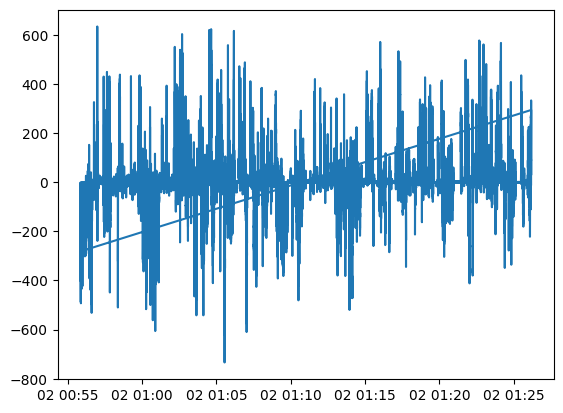

In [4]:
# read harp stream
flow_sensor = utils.load_harp(h1_reader.OpticalTrackingRead, h1_datafolder)
print(flow_sensor)
print(flow_sensor.index)

plt.figure()
plt.plot(flow_sensor['OpticalTrackingRead0Y'])

In [6]:
# Convert to a playback file with 20-point smoothing
smoothed_data = flow_sensor['OpticalTrackingRead0Y'].rolling(window=20, center=True).mean()

# Fill NaN values at edges (from rolling window) with original values
smoothed_data = smoothed_data.fillna(flow_sensor['OpticalTrackingRead0Y'])

# Convert to int16 for output
output_data = smoothed_data.astype(np.int16)

output_data.to_csv('B6J4070_SD_day2playback_file_smoothed.csv', header=False, sep=',', lineterminator='\n')
